###**CREDIT SCORE CLASSIFICATION**

# **Prologue**

The purpose of this study is to determine the creditworthiness of the customer.

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. 

The management wants to build an intelligent system to segregate the customer into credit score brackets to reduce the manual efforts by using Machine Learning algorithms to classify all the customers in their database based on their credit history.

There are three credit scores that banks and credit card companies use to label their customers:

1. Good
2. Standard
3. Poor 

A person with a good credit score will get loans from any bank and financial institution.

The features in the dataset :
1. ID: Unique ID of the record
2. Customer_ID: Unique ID of the customer
3. Month: Month of the year
4. Name: The name of the person
5. Age: The age of the person
6. SSN: Social Security Number of the person
7. Occupation: The occupation of the person
8. Annual_Income: The Annual Income of the person
9. Monthly_Inhand_Salary: Monthly in-hand salary of the person
10. Num_Bank_Accounts: The number of bank accounts of the person
11. Num_Credit_Card: Number of credit cards the person is having
12. Interest_Rate: The interest rate on the credit card of the person
13. Num_of_Loan: The number of loans taken by the person from the bank
14. Type_of_Loan: The types of loans taken by the person from the bank
15. Delay_from_due_date: The average number of days delayed by the person from the date of payment
16. Num_of_Delayed_Payment: Number of payments delayed by the person
17. Changed_Credit_Card: The percentage change in the credit card limit of the person
18. Num_Credit_Inquiries: The number of credit card inquiries by the person
19. Credit_Mix: Classification of Credit Mix of the customer
20. Outstanding_Debt: The outstanding balance of the person
21. Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
22. Credit_History_Age: The age of the credit history of the person
23. Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
24. Total_EMI_per_month: The total EMI per month of the person
25. Amount_invested_monthly: The monthly amount invested by the person
26. Payment_Behaviour: The payment behaviour of the person
27. Monthly_Balance: The monthly balance left in the account of the person
28. Credit_Score: The credit score of the person

the source of dataset : https://www.kaggle.com/datasets/parisrohan/credit-score-classification

# **Introducing Libraries and Datasets (BASELINE)**

## Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

pd.options.display.float_format = '{:,.6f}'.format

## Import Dataset

In [2]:
train_df = pd.read_csv('train[1].csv')

In [3]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Information

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Target Distribution

In [5]:
train_df['Credit_Score'].value_counts(dropna = False)

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [6]:
train_df['Credit_Score'].value_counts(normalize = True)*100

Standard   53.174000
Poor       28.998000
Good       17.828000
Name: Credit_Score, dtype: float64

## Feature vs Target Correlation

In [7]:
# Convert target to numeric
train_df['Credit_Score'] = train_df['Credit_Score'].replace("Poor", 1).replace("Standard", 0).replace("Good", 0)

In [8]:
train_df['Credit_Score'].value_counts(normalize = True)*100

0   71.002000
1   28.998000
Name: Credit_Score, dtype: float64

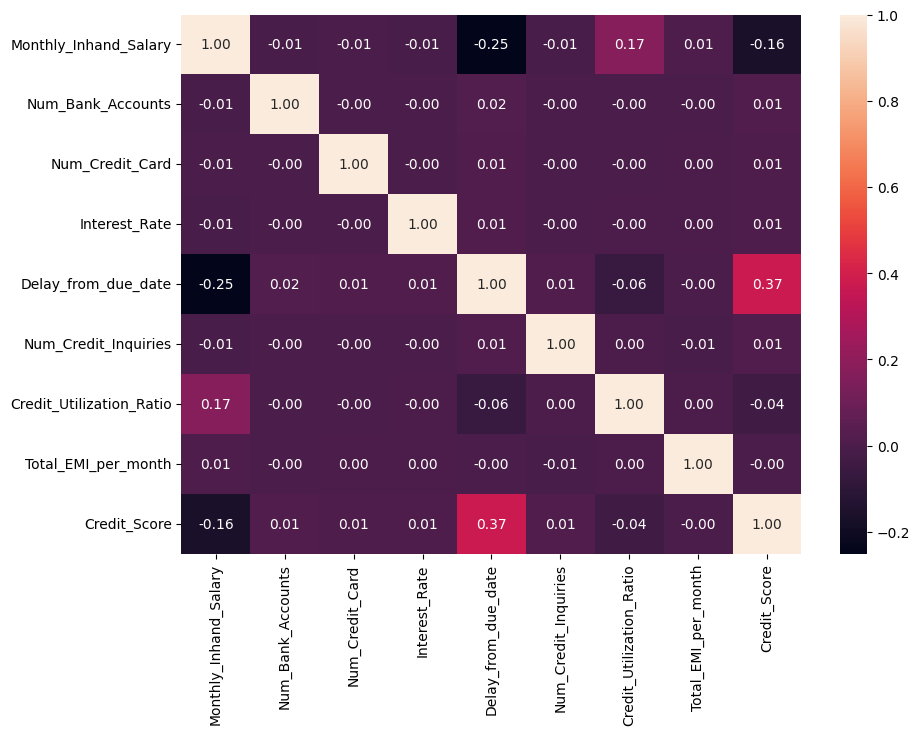

In [9]:
plt.figure(figsize=(10,7))
correlation = train_df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')        
plt.show()

for the first hypothesis, we can see that just 1 feature have high correlation 'Delay_from_due_date' 0.37 to Credit_Score

## Simple Data Preparation

### Drop Unused Feature

In [10]:
# Drop unused feature : 'ID', 'Customer_ID', 'Month', 'SSN'
train_df = train_df.drop(['ID', 'Customer_ID', 'Month', 'SSN'], axis=1)

In [11]:
train_df.head()

,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,"1,824.843333",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,Aaron Maashoh,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,Aaron Maashoh,23,Scientist,19114.12,"1,824.843333",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


### Drop Duplicates

In [12]:
# Checking Duplicated
train_df.duplicated().sum()

0

### Checking Missing Values

In [13]:
train_df.isnull().sum()

Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [14]:
train_df = train_df.dropna().reset_index(drop=True)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53049 entries, 0 to 53048
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      53049 non-null  object 
 1   Age                       53049 non-null  object 
 2   Occupation                53049 non-null  object 
 3   Annual_Income             53049 non-null  object 
 4   Monthly_Inhand_Salary     53049 non-null  float64
 5   Num_Bank_Accounts         53049 non-null  int64  
 6   Num_Credit_Card           53049 non-null  int64  
 7   Interest_Rate             53049 non-null  int64  
 8   Num_of_Loan               53049 non-null  object 
 9   Type_of_Loan              53049 non-null  object 
 10  Delay_from_due_date       53049 non-null  int64  
 11  Num_of_Delayed_Payment    53049 non-null  object 
 12  Changed_Credit_Limit      53049 non-null  object 
 13  Num_Credit_Inquiries      53049 non-null  float64
 14  Credit

### Numeric Feature

In [16]:
train_df_temp = train_df.select_dtypes(include=np.number)
train_df_temp.head()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
0,"1,824.843333",3,4,3,3,4.000000,26.822620,49.574949,0
1,"1,824.843333",3,4,3,3,4.000000,22.537593,49.574949,0
2,"3,037.986667",2,4,6,3,2.000000,24.464031,18.816215,0
3,"3,037.986667",2,4,6,7,2.000000,38.550848,18.816215,0
4,"3,037.986667",2,1385,6,3,2.000000,33.224951,18.816215,0


### Target Distribution

In [17]:
train_df['Credit_Score'].value_counts(normalize = True)*100

0   68.866520
1   31.133480
Name: Credit_Score, dtype: float64

### Split Train & Test

In [18]:
X = train_df_temp.drop('Credit_Score', axis=1)
y = train_df_temp[['Credit_Score']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Modeling and Evaluation

In [20]:
list_model = [
                LogisticRegression(),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                XGBClassifier(),
]

df = pd.DataFrame(columns = ['Method', 'F1 Score', 'Classification Report'])

for model in list_model: 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]

    #AUC score
    f1 = f1_score(y_test, y_pred)
    c_report = classification_report(y_test, y_pred, digits=6)

    df = df.append({'Method': method,
                    'F1 Score': f1,
                    'Classification Report': c_report},
                    ignore_index=True)

In [21]:
df

,Method,F1 Score,Classification Report
0,LogisticRegression,0.422973,precision recall f1-score ...
1,DecisionTreeClassifier,0.673107,precision recall f1-score ...
2,RandomForestClassifier,0.742437,precision recall f1-score ...
3,XGBClassifier,0.700241,precision recall f1-score ...


In [22]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.848666  0.856782  0.852705      9098
           1   0.680481  0.666267  0.673299      4165

    accuracy                       0.796954     13263
   macro avg   0.764573  0.761524  0.763002     13263
weighted avg   0.795851  0.796954  0.796366     13263



## Detail Evaluation

In [23]:
df

,Method,F1 Score,Classification Report
0,LogisticRegression,0.422973,precision recall f1-score ...
1,DecisionTreeClassifier,0.673107,precision recall f1-score ...
2,RandomForestClassifier,0.742437,precision recall f1-score ...
3,XGBClassifier,0.700241,precision recall f1-score ...


### Load Dataset (IMPROVEMENT MODEL)

In [24]:
train_df = pd.read_csv('train[1].csv')

In [25]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Information

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Target Distribution

In [27]:
train_df['Credit_Score'].value_counts(dropna = False)

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [28]:
train_df['Credit_Score'].value_counts(normalize = True)*100

Standard   53.174000
Poor       28.998000
Good       17.828000
Name: Credit_Score, dtype: float64

## Feature vs Target Correlation

In [29]:
map_cs = {
    'Poor' : 1,
    'Standard' : 0,
    'Good' :0
}
train_df['Credit_Score'] = train_df['Credit_Score'].map(map_cs)

In [30]:
train_df['Credit_Score'].value_counts(normalize = True)*100

0   71.002000
1   28.998000
Name: Credit_Score, dtype: float64

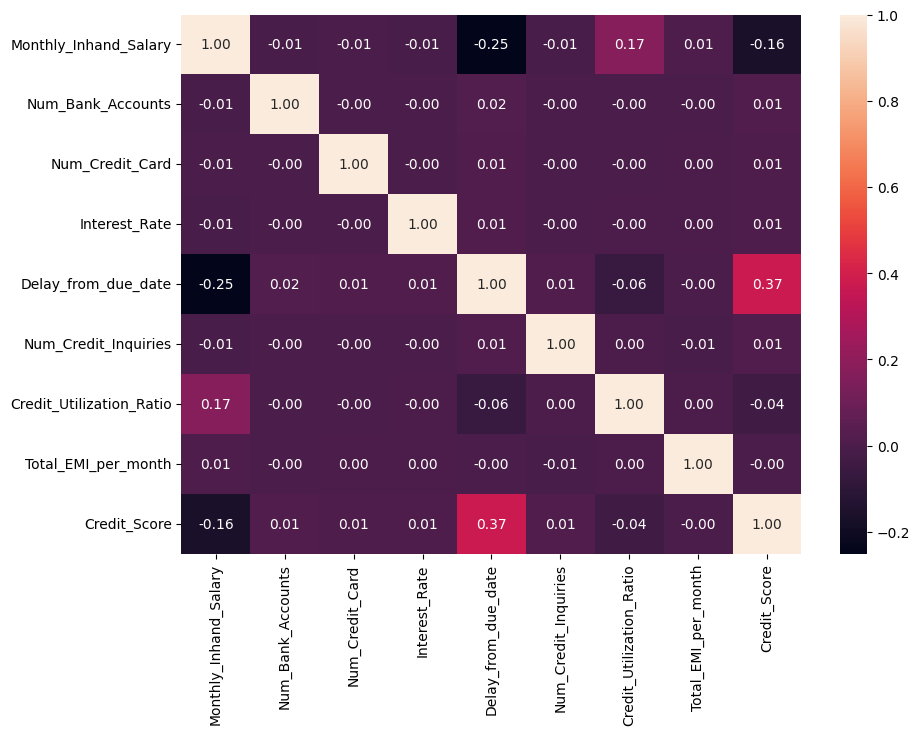

In [31]:
plt.figure(figsize=(10,7))
correlation = train_df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')        
plt.show()

for the first hypothesis, we can see that just 1 feature have high correlation 'Delay_from_due_date' 0.37 to Credit_Score

## Data Preparation 1

## Drop Unused Feature

In [32]:
# Drop unused feature : 'ID', 'Customer_ID', 'Month', 'SSN'
train_df = train_df.drop(['ID', 'Customer_ID', 'Month', 'SSN'], axis=1)

In [33]:
train_df.head()

,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,"1,824.843333",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,Aaron Maashoh,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,Aaron Maashoh,23,Scientist,19114.12,"1,824.843333",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


## Drop Duplicates

In [34]:
train_df.duplicated().sum()

0

In [35]:
train_df = train_df.drop_duplicates()

## Checking Missing Value

In [36]:
train_df.isnull().sum()

Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [37]:
train_df = train_df.dropna().reset_index(drop=True)

## Build Simple Processing Function

In [38]:
def drop_feature(data):
    data = data.drop(['ID', 'Customer_ID', 'Month', 'SSN'], axis=1)
    return data

In [39]:
def simple_preprocessing(data):
    data = data.drop_duplicates()
    data = data.dropna().reset_index(drop=True)

    map_cs = {
        'Poor' : 1,
        'Standard' : 0,
        'Good' :0
    }

    data['Credit_Score'] = data['Credit_Score'].map(map_cs)
    return data

Build Modelling to Function

In [40]:
def my_modeling(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

    list_model = [
                DecisionTreeClassifier(),
                RandomForestClassifier(random_state = 42),
                XGBClassifier(random_state = 42)
    ]

    df = pd.DataFrame(columns = ['Method', 'F1 Score', 'Classification Report'])

    for model in list_model:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        method = str(type(model)).split('.')[-1][:]

        #AUC Score
        f1 = f1_score(y_test, y_pred)
        c_report = classification_report(y_test, y_pred, digits=6)

        df = df.append({'Method': method,
                        'F1 Score': f1,
                        'Classification Report': c_report},
                      ignore_index=True)
    return df

## Data Preparation 2 - Scaling

In [41]:
data = pd.read_csv('train[1].csv')
data.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [42]:
data = simple_preprocessing(data)
data.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,0
2,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,"3,037.986667",2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,0


In [43]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
0,"1,824.843333",3,4,3,3,4.000000,26.822620,49.574949,0
1,"1,824.843333",3,4,3,3,4.000000,22.537593,49.574949,0


## Scaling

In [44]:
X = data_temp.drop('Credit_Score', axis=1)
y = data_temp[['Credit_Score']]

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df1 = my_modeling(X_std,y)
df1['status'] = 'scaling'
df1

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.673529,precision recall f1-score ...,scaling
1,RandomForestClassifier'>,0.742807,precision recall f1-score ...,scaling
2,XGBClassifier'>,0.704944,precision recall f1-score ...,scaling


## Data Preparation 3 - Scaling With Continue Data

In [45]:
data = pd.read_csv('train[1].csv')
data.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [46]:
data = simple_preprocessing(data)
data.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,0
2,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,"3,037.986667",2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,0


In [47]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
0,"1,824.843333",3,4,3,3,4.000000,26.822620,49.574949,0
1,"1,824.843333",3,4,3,3,4.000000,22.537593,49.574949,0


In [48]:
data_temp.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
count,"53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000"
mean,"4,024.502617",16.842806,22.787253,76.272352,21.994119,27.062866,32.219031,"1,445.924761",0.311335
std,"3,094.967739",115.605025,129.339640,479.226709,15.220406,187.185825,5.057398,"8,407.429893",0.463044
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837,0.000000
25%,"1,575.345833",4.000000,4.000000,8.000000,10.000000,3.000000,28.046338,41.244418,0.000000
50%,"2,991.016667",6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.418272,0.000000
75%,"5,712.553333",8.000000,7.000000,22.000000,29.000000,9.000000,36.408991,169.286269,1.000000
max,"15,204.633333","1,798.000000","1,499.000000","5,797.000000",67.000000,"2,594.000000",49.564519,"82,331.000000",1.000000


## Scaling with Data Continue

In [49]:
data_temp['Monthly_Inhand_Salary'] = StandardScaler().fit_transform(data_temp['Monthly_Inhand_Salary'].values.reshape(len(data_temp),1))
data_temp['Num_Credit_Inquiries'] = StandardScaler().fit_transform(data_temp['Num_Credit_Inquiries'].values.reshape(len(data_temp),1))
data_temp['Credit_Utilization_Ratio'] = StandardScaler().fit_transform(data_temp['Credit_Utilization_Ratio'].values.reshape(len(data_temp),1))
data_temp['Total_EMI_per_month'] = StandardScaler().fit_transform(data_temp['Total_EMI_per_month'].values.reshape(len(data_temp),1))

In [50]:
X = data_temp.drop('Credit_Score', axis=1)
y = data_temp[['Credit_Score']]

df2 = my_modeling(X,y)
df2['status'] = 'scaling with data continue'

In [51]:
df

,Method,F1 Score,Classification Report
0,LogisticRegression,0.422973,precision recall f1-score ...
1,DecisionTreeClassifier,0.673107,precision recall f1-score ...
2,RandomForestClassifier,0.742437,precision recall f1-score ...
3,XGBClassifier,0.700241,precision recall f1-score ...


In [52]:
df1

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.673529,precision recall f1-score ...,scaling
1,RandomForestClassifier'>,0.742807,precision recall f1-score ...,scaling
2,XGBClassifier'>,0.704944,precision recall f1-score ...,scaling


In [53]:
df2

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.676400,precision recall f1-score ...,scaling with data continue
1,RandomForestClassifier'>,0.741996,precision recall f1-score ...,scaling with data continue
2,XGBClassifier'>,0.704944,precision recall f1-score ...,scaling with data continue


## Data Preparation 4 - Age convert to numeric

In [54]:
#Drop 'Month' 
list_unused_feat = ['Month']

In [55]:
data = pd.read_csv('train[1].csv')
data = data.drop(list_unused_feat, axis=1)
data.head(3)

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [56]:
data[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Age     100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [57]:
data['Age'] = data['Age'].str.extract('(\d+)')
data['Age'] = data['Age'].astype(int)
data.head(3)

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [58]:
data[['Age']].describe()

,Age
count,"100,000.000000"
mean,119.509700
std,684.757313
min,14.000000
25%,25.000000
50%,34.000000
75%,42.000000
max,"8,698.000000"


In [59]:
data = simple_preprocessing(data)
data.head(3)

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1608,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,0
2,0x160e,CUS_0x21b1,Rick Rothackerj,28,004-07-5839,_______,34847.84,"3,037.986667",2,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,0


In [60]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
0,23,"1,824.843333",3,4,3,3,4.000000,26.822620,49.574949,0
1,23,"1,824.843333",3,4,3,3,4.000000,22.537593,49.574949,0


In [61]:
X = data_temp.drop('Credit_Score', axis=1)
y = data_temp[['Credit_Score']]

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df2 = my_modeling(X_std,y)
df2['status'] = 'scaling + age data type'

In [62]:
df

,Method,F1 Score,Classification Report
0,LogisticRegression,0.422973,precision recall f1-score ...
1,DecisionTreeClassifier,0.673107,precision recall f1-score ...
2,RandomForestClassifier,0.742437,precision recall f1-score ...
3,XGBClassifier,0.700241,precision recall f1-score ...


In [63]:
df1

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.673529,precision recall f1-score ...,scaling
1,RandomForestClassifier'>,0.742807,precision recall f1-score ...,scaling
2,XGBClassifier'>,0.704944,precision recall f1-score ...,scaling


In [64]:
df2

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.684337,precision recall f1-score ...,scaling + age data type
1,RandomForestClassifier'>,0.751547,precision recall f1-score ...,scaling + age data type
2,XGBClassifier'>,0.702058,precision recall f1-score ...,scaling + age data type


Terdapat peningkatan dengan menambahkan fitur age

## Data Preparation 5 - Age Normalize



In [65]:
data = pd.read_csv('train[1].csv')
data = data.drop(list_unused_feat, axis=1)
data['Age'] = data['Age'].str.extract('(\d+)')
data['Age'] = data['Age'].astype(int)
data.head(3)

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


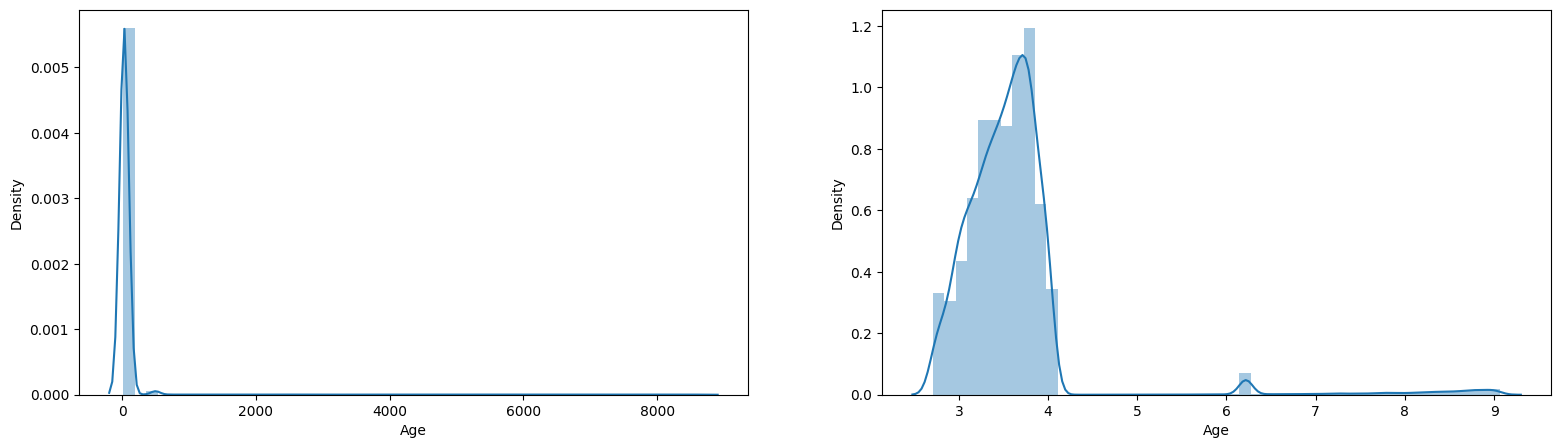

In [66]:
fig, ax = plt.subplots(1,2,figsize=(19,5))
sns.distplot(data['Age'], ax=ax[0])

sns.distplot(np.log(data['Age']+1), ax=ax[1])

data['Age'] = np.log(data['Age']+1)

In [67]:
data = simple_preprocessing(data)
data.head(3)

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,3.178054,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1608,CUS_0xd40,Aaron Maashoh,3.178054,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,0
2,0x160e,CUS_0x21b1,Rick Rothackerj,3.367296,004-07-5839,_______,34847.84,"3,037.986667",2,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,0


In [68]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
0,3.178054,"1,824.843333",3,4,3,3,4.000000,26.822620,49.574949,0
1,3.178054,"1,824.843333",3,4,3,3,4.000000,22.537593,49.574949,0


<Axes: xlabel='Age', ylabel='Density'>

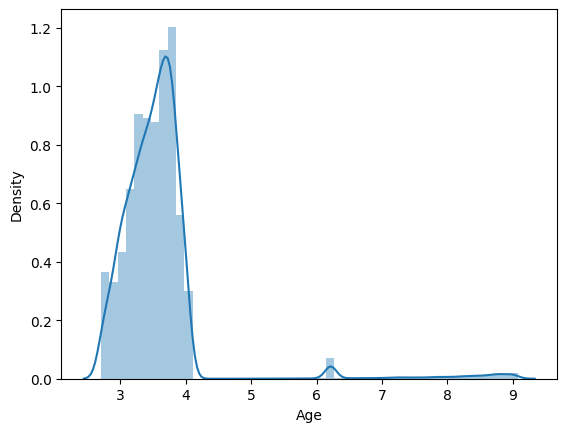

In [69]:
sns.distplot(data_temp['Age'])

In [70]:
X = data_temp.drop('Credit_Score', axis=1)
y = data_temp[['Credit_Score']]

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df2 = my_modeling(X_std,y)
df2['status'] = 'scaling + age normalize'

In [71]:
df

,Method,F1 Score,Classification Report
0,LogisticRegression,0.422973,precision recall f1-score ...
1,DecisionTreeClassifier,0.673107,precision recall f1-score ...
2,RandomForestClassifier,0.742437,precision recall f1-score ...
3,XGBClassifier,0.700241,precision recall f1-score ...


In [72]:
df1

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.673529,precision recall f1-score ...,scaling
1,RandomForestClassifier'>,0.742807,precision recall f1-score ...,scaling
2,XGBClassifier'>,0.704944,precision recall f1-score ...,scaling


In [73]:
df2

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.684204,precision recall f1-score ...,scaling + age normalize
1,RandomForestClassifier'>,0.751856,precision recall f1-score ...,scaling + age normalize
2,XGBClassifier'>,0.702058,precision recall f1-score ...,scaling + age normalize


## Data Preparation 6



In [74]:
data.head()

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,3.178054,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1608,CUS_0xd40,Aaron Maashoh,3.178054,821-00-0265,Scientist,19114.12,"1,824.843333",3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,0
2,0x160e,CUS_0x21b1,Rick Rothackerj,3.367296,004-07-5839,_______,34847.84,"3,037.986667",2,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,0
3,0x160f,CUS_0x21b1,Rick Rothackerj,3.367296,004-07-5839,Teacher,34847.84,"3,037.986667",2,4,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,0
4,0x1610,CUS_0x21b1,Rick Rothackerj,3.367296,004-07-5839,Teacher,34847.84_,"3,037.986667",2,1385,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53049 entries, 0 to 53048
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Name                      53049 non-null  object 
 3   Age                       53049 non-null  float64
 4   SSN                       53049 non-null  object 
 5   Occupation                53049 non-null  object 
 6   Annual_Income             53049 non-null  object 
 7   Monthly_Inhand_Salary     53049 non-null  float64
 8   Num_Bank_Accounts         53049 non-null  int64  
 9   Num_Credit_Card           53049 non-null  int64  
 10  Interest_Rate             53049 non-null  int64  
 11  Num_of_Loan               53049 non-null  object 
 12  Type_of_Loan              53049 non-null  object 
 13  Delay_from_due_date       53049 non-null  int64  
 14  Num_of

In [76]:
occupation_count = data['Occupation'].value_counts(dropna = False)
occupation_count

_______          3727
Lawyer           3558
Mechanic         3419
Doctor           3344
Teacher          3341
Entrepreneur     3326
Architect        3325
Engineer         3321
Media_Manager    3306
Accountant       3305
Scientist        3281
Developer        3279
Writer           3150
Musician         3136
Journalist       3124
Manager          3107
Name: Occupation, dtype: int64

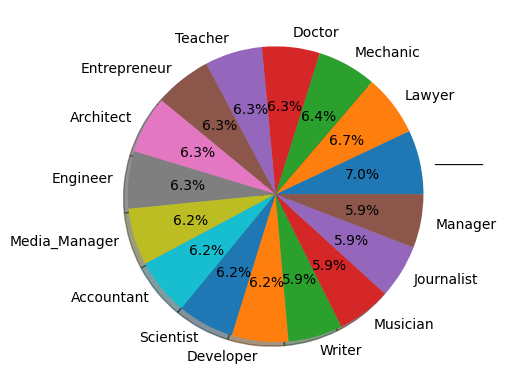

In [77]:
label = data.Occupation.value_counts().index
label_count = data.Occupation.value_counts().values
plt.pie(data=data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

We can see that Occupation feature is almost equally distributted, without drop the unique values as others

In [78]:
data['Occupation'] = data['Occupation'].str.replace('Lawyer', '0')
data['Occupation'] = data['Occupation'].str.replace('Mechanic', '1')
data['Occupation'] = data['Occupation'].str.replace('Doctor', '2')
data['Occupation'] = data['Occupation'].str.replace('Teacher', '3')
data['Occupation'] = data['Occupation'].str.replace('Entrepreneur', '4')
data['Occupation'] = data['Occupation'].str.replace('Architect', '5')
data['Occupation'] = data['Occupation'].str.replace('Engineer', '6')
data['Occupation'] = data['Occupation'].str.replace('Media_Manager', '7')
data['Occupation'] = data['Occupation'].str.replace('Accountant', '8')
data['Occupation'] = data['Occupation'].str.replace('Scientist', '9')
data['Occupation'] = data['Occupation'].str.replace('Developer', '10')
data['Occupation'] = data['Occupation'].str.replace('Writer', '11')
data['Occupation'] = data['Occupation'].str.replace('Musician', '12')
data['Occupation'] = data['Occupation'].str.replace('Journalist', '13')
data['Occupation'] = data['Occupation'].str.replace('Manager', '14')
data['Occupation'] = data['Occupation'].str.replace('_______', '15')
data['Occupation'] = data[['Occupation']].apply(pd.to_numeric)

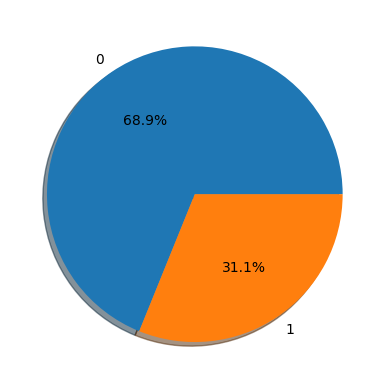

In [79]:
# Explore Data Balance
label = data.Credit_Score.value_counts().index
label_count = data.Credit_Score.value_counts().values
plt.pie(data=data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

In [80]:
for i in data:
  print('\n',i,data[i].unique())


 ID ['0x1602' '0x1608' '0x160e' ... '0x25fea' '0x25feb' '0x25fed']

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 Name ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 Age [3.17805383 3.36729583 3.55534806 ... 9.03907744 7.72488844 7.2026612 ]

 SSN ['821-00-0265' '004-07-5839' '486-85-3974' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

 Occupation [ 9 15  3  6  4  0  7  2 13 14  1 11  8  5 12 10]

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]

 Num_Bank_Accounts [   3    2    1    0    8    5    6    7    9   10    4   67  528 1647
 1696  649  889 1620 1388 1429 1777 1096  803  494 1414  831  121  823
 1356 1651  711  210 1671  648  672 1662 1495  666  429  980  718 1312
  501  628 1016 1265  791  427 1036  619  555 1769  2

In [81]:
#Transform the information to the value
data['Credit_History_Age'] = data['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
data['Credit_History_Age'] = data['Credit_History_Age'].astype(str).str.replace('Months','')

In [82]:
Payment_Behaviour_count = data['Payment_Behaviour'].value_counts(dropna = False)
Payment_Behaviour_count

Low_spent_Small_value_payments      13581
High_spent_Medium_value_payments     9418
Low_spent_Medium_value_payments      7264
High_spent_Large_value_payments      7185
High_spent_Small_value_payments      6096
Low_spent_Large_value_payments       5576
!@9#%8                               3929
Name: Payment_Behaviour, dtype: int64

In [83]:
#Transform the information to the value as level
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype(str).str.replace('!@9#%8','7')

In [84]:
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].str.replace('NM', '0')
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].str.replace('Yes', '1')
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].str.replace('No', '2')
data['Payment_of_Min_Amount'] = data[['Payment_of_Min_Amount']].apply(pd.to_numeric)

In [85]:
# Revise the incorrect data whole table
sym = "\\`*_{}[]()>#@+!$:;"
col_str = ['Annual_Income','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Num_of_Loan']
for i in col_str:
  for c in sym:
    data[i] = data[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    data[i] = data[i].replace(c,'')
data.head()

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,3.178054,821-00-0265,9,19114.12,"1,824.843333",3,4,...,_,809.98,26.822620,22.1,2,49.57494921489417,80.41529543900253,4,312.49408867943663,0
1,0x1608,CUS_0xd40,Aaron Maashoh,3.178054,821-00-0265,9,19114.12,"1,824.843333",3,4,...,Good,809.98,22.537593,22.7,2,49.57494921489417,178.3440674122349,1,244.5653167062043,0
2,0x160e,CUS_0x21b1,Rick Rothackerj,3.367296,004-07-5839,15,34847.84,"3,037.986667",2,4,...,Good,605.03,24.464031,26.7,2,18.816214573128885,104.291825168246,1,470.69062692529184,0
3,0x160f,CUS_0x21b1,Rick Rothackerj,3.367296,004-07-5839,3,34847.84,"3,037.986667",2,4,...,Good,605.03,38.550848,26.8,2,18.816214573128885,40.39123782853101,6,484.5912142650067,0
4,0x1610,CUS_0x21b1,Rick Rothackerj,3.367296,004-07-5839,3,34847.84,"3,037.986667",2,1385,...,_,605.03,33.224951,26.9,2,18.816214573128885,58.51597569589465,6,466.46647639764313,0


In [86]:
#Transform the object data the be float data type 
col_str = ['Annual_Income','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Num_of_Loan']
for i in col_str:
  data[i] = data[i].astype(float)
data.dtypes

ID                           object
Customer_ID                  object
Name                         object
Age                         float64
SSN                          object
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [87]:
# Drop column which is out of model scope
d_col = ['ID', 'Customer_ID', 'SSN']
data = data.drop(d_col, axis=1)

In [88]:
data.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,"53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000","53,049.000000"
mean,3.585801,7.430545,"177,716.777650","4,024.502617",16.842806,22.787253,76.272352,3.408189,21.994119,31.781447,27.062866,"1,507.116244",32.219031,17.695994,1.201455,"1,445.924761",3.523610,"-37,700,993,421,176,647,712,768.000000",0.311335
std,0.772464,4.654352,"1,456,238.919656","3,094.967739",115.605025,129.339640,479.226709,62.532350,15.220406,228.980000,187.185825,"1,187.144881",5.057398,8.336221,0.632558,"8,407.429893",2.028770,"3,544,829,095,171,794,740,969,472.000000",0.463044
min,2.708050,0.000000,"7,005.930000",303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.881250,0.100000,0.000000,4.462837,1.000000,"-333,333,333,333,333,314,856,026,112.000000",0.000000
25%,3.218876,3.000000,"18,873.200000","1,575.345833",4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,3.000000,606.470000,28.046338,11.100000,1.000000,41.244418,1.000000,264.578882,0.000000
50%,3.526361,7.000000,"36,048.080000","2,991.016667",6.000000,6.000000,15.000000,3.000000,19.000000,14.000000,6.000000,"1,240.450000",32.251786,17.500000,1.000000,78.418272,4.000000,325.160981,0.000000
75%,3.761200,11.000000,"69,895.760000","5,712.553333",8.000000,7.000000,22.000000,6.000000,29.000000,19.000000,9.000000,"2,130.220000",36.408991,24.200000,2.000000,169.286269,5.000000,443.944693,1.000000
max,9.070848,15.000000,"24,198,062.000000","15,204.633333","1,798.000000","1,499.000000","5,797.000000","1,485.000000",67.000000,"4,397.000000","2,594.000000","4,998.070000",49.564519,33.800000,2.000000,"82,331.000000",7.000000,"1,552.946094",1.000000


In [89]:
numerical1 = ['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']

In [90]:
numerical2 = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance']

In [91]:
numericals = ['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance']

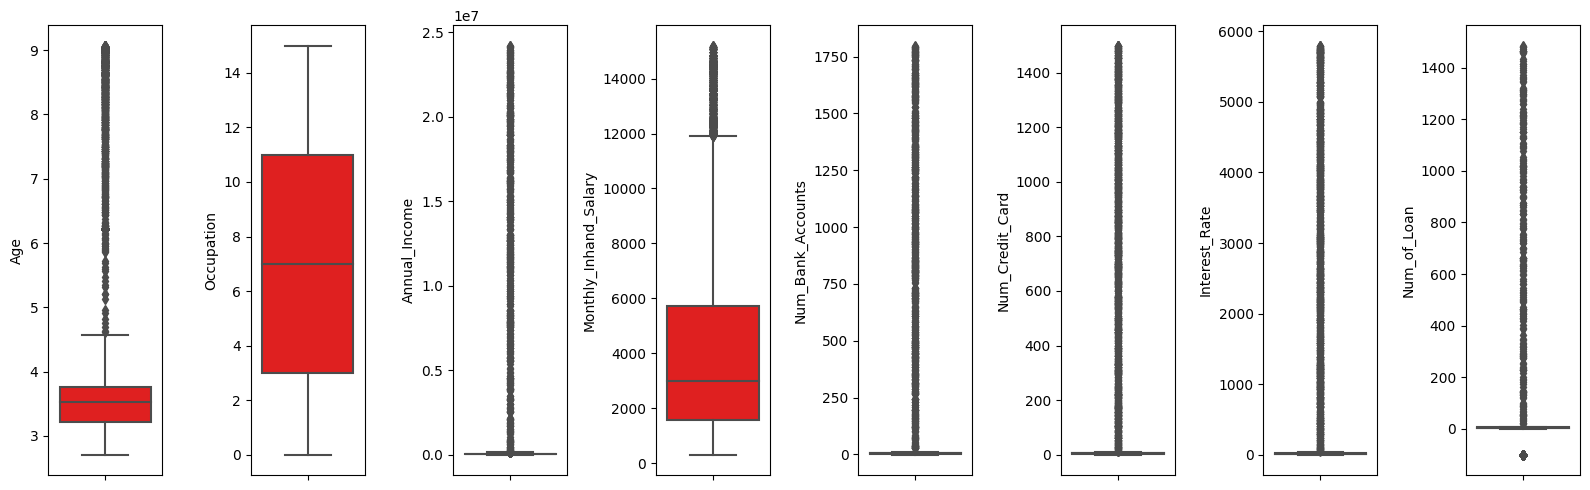

In [92]:
# adjust the figure size for better readability
fig, axs = plt.subplots(figsize=(16, 5))

# plotting
features = numerical1
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

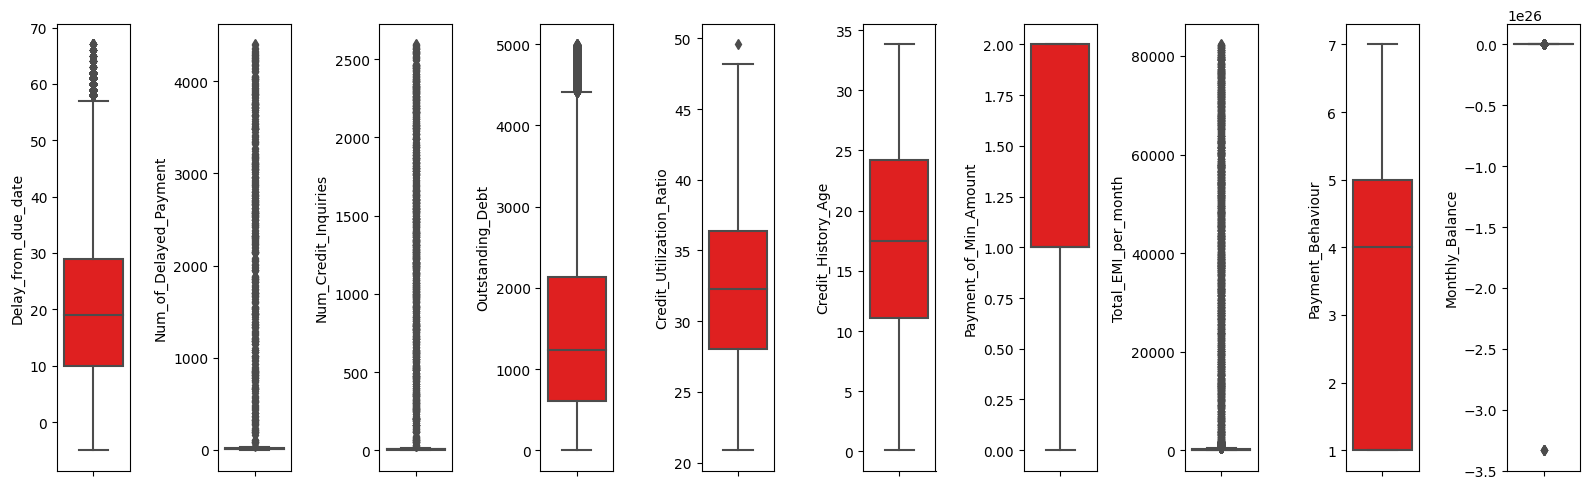

In [93]:
# adjust the figure size for better readability
fig, axs = plt.subplots(figsize=(16, 5))

# plotting
features = numerical2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

In [94]:
# Drop outlier by IQR calculation
Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = data.drop(data.loc[data['Age'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = data.drop(data.loc[data['Age'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,3.178054,9,"19,114.120000","1,824.843333",3,4,3,4.000000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.980000,26.822620,22.100000,2,49.574949,80.41529543900253,4.000000,312.494089,0
1,Aaron Maashoh,3.178054,9,"19,114.120000","1,824.843333",3,4,3,4.000000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.980000,22.537593,22.700000,2,49.574949,178.3440674122349,1.000000,244.565317,0
2,Rick Rothackerj,3.367296,15,"34,847.840000","3,037.986667",2,4,6,1.000000,Credit-Builder Loan,...,Good,605.030000,24.464031,26.700000,2,18.816215,104.291825168246,1.000000,470.690627,0
3,Rick Rothackerj,3.367296,3,"34,847.840000","3,037.986667",2,4,6,1.000000,Credit-Builder Loan,...,Good,605.030000,38.550848,26.800000,2,18.816215,40.39123782853101,6.000000,484.591214,0
4,Rick Rothackerj,3.367296,3,"34,847.840000","3,037.986667",2,1385,6,1.000000,Credit-Builder Loan,...,_,605.030000,33.224951,26.900000,2,18.816215,58.51597569589465,6.000000,466.466476,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53044,Nicks,3.258097,1,"39,628.990000","3,359.415833",4,6,7,2.000000,"Auto Loan, and Student Loan",...,_,502.380000,39.323569,31.500000,2,35.104023,140.58140274528395,5.000000,410.256158,1
53045,Nicks,3.258097,1,"39,628.990000","3,359.415833",4,6,7,2.000000,"Auto Loan, and Student Loan",...,_,502.380000,34.663572,31.600000,2,35.104023,60.97133255718485,6.000000,479.866228,1
53046,Nicks,3.258097,1,"39,628.990000","3,359.415833",4,6,7,2.000000,"Auto Loan, and Student Loan",...,_,502.380000,40.565631,31.700000,2,35.104023,54.18595028760385,5.000000,496.651610,1
53047,Nicks,3.258097,1,"39,628.990000","3,359.415833",4,6,5729,2.000000,"Auto Loan, and Student Loan",...,Good,502.380000,41.255522,31.800000,2,35.104023,24.02847744864441,6.000000,516.809083,1


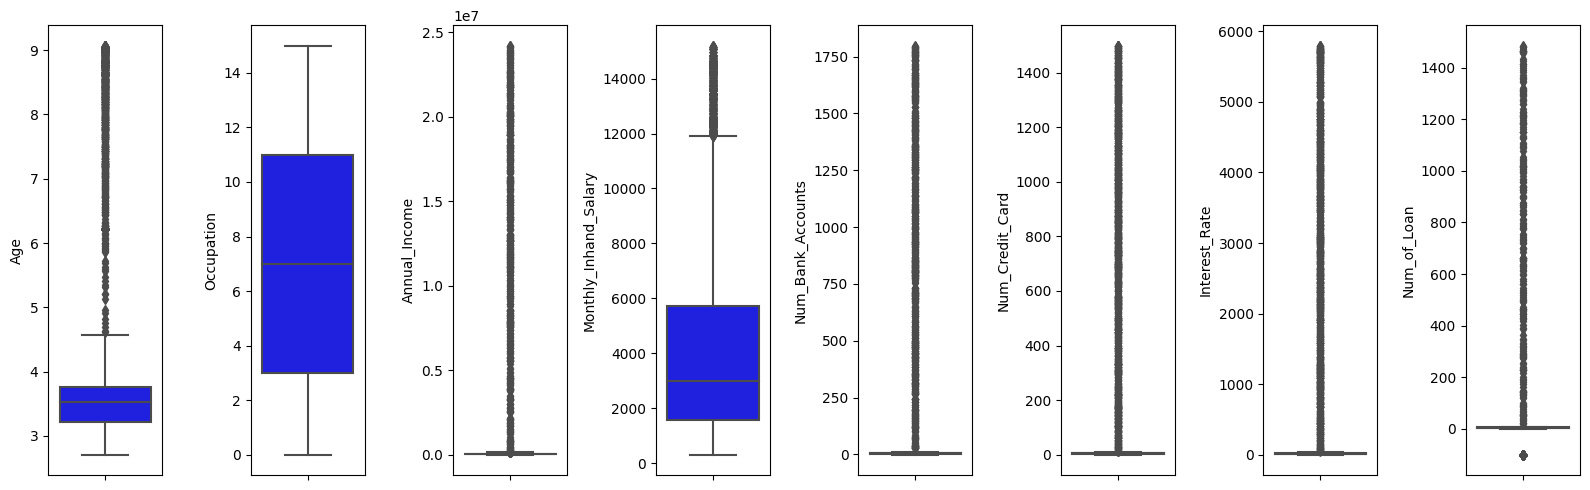

In [95]:
# adjust the figure size for better readability
fig, axs = plt.subplots(figsize=(16, 5))

# plotting
features = numerical1
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='blue')
    plt.tight_layout()

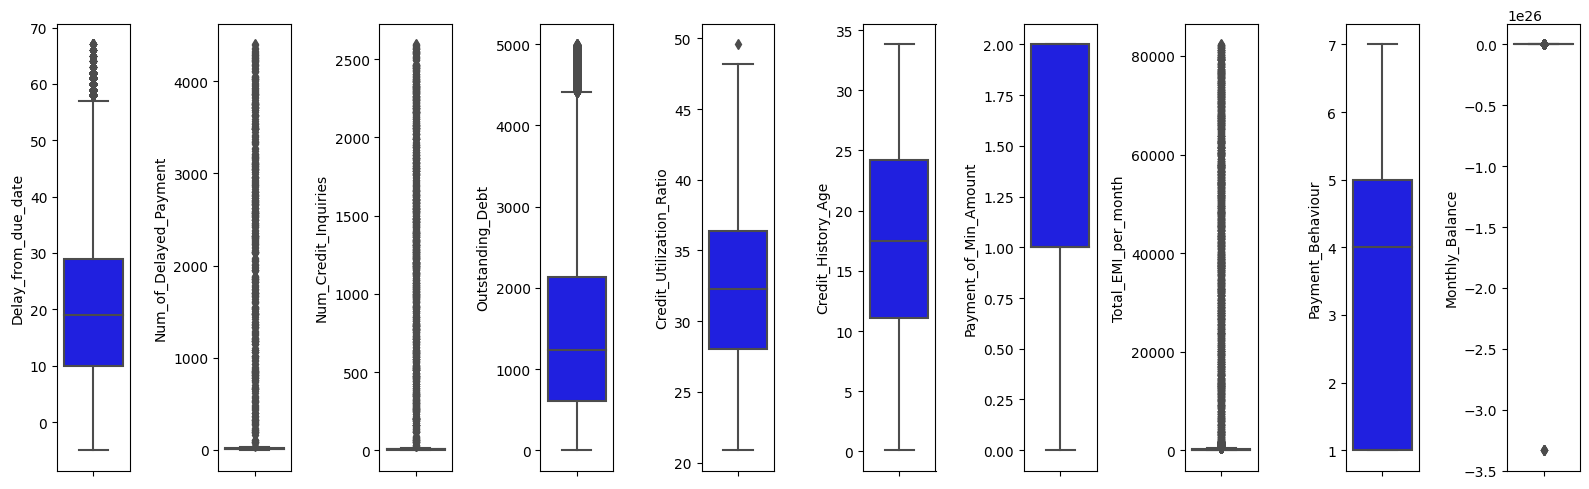

In [96]:
# adjust the figure size for better readability
fig, axs = plt.subplots(figsize=(16, 5))

# plotting
features = numerical2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='blue')
    plt.tight_layout()

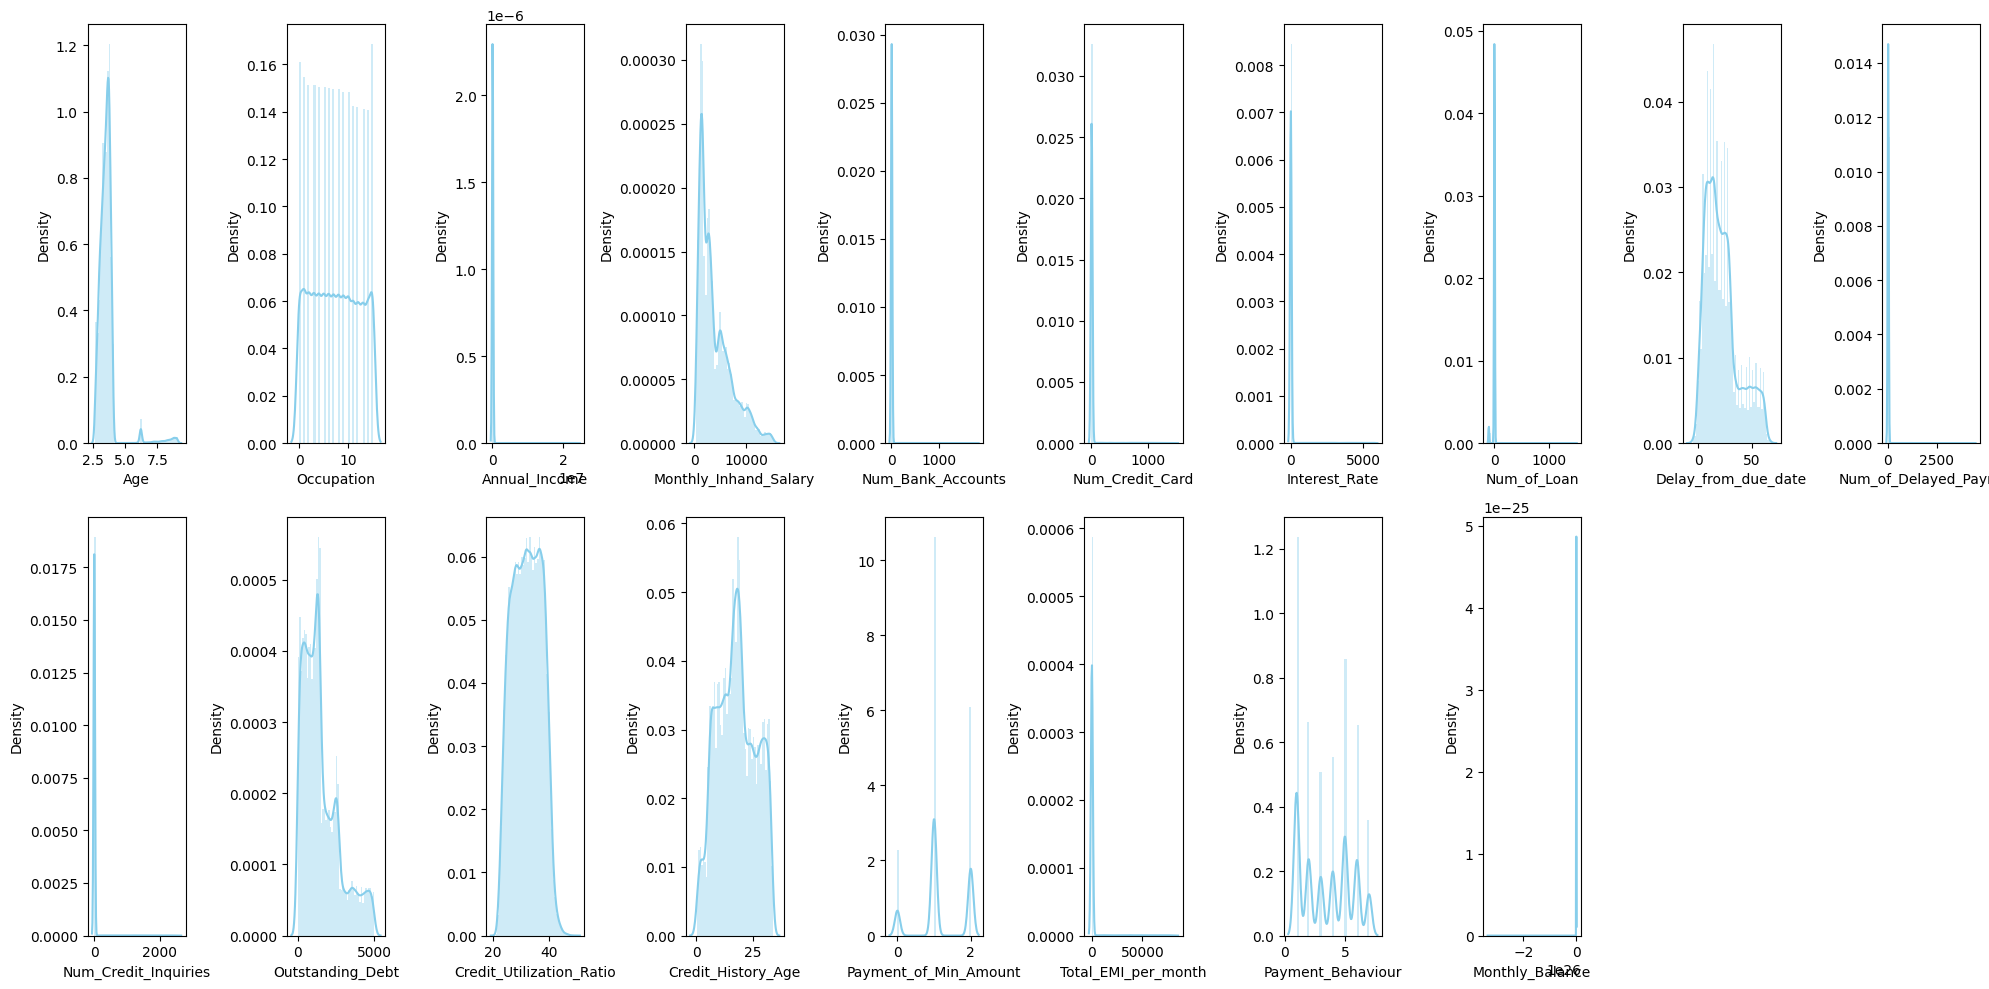

In [97]:
# Melihat distribusi data
# adjust the figure size for better readability
plt.figure(figsize=(20,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

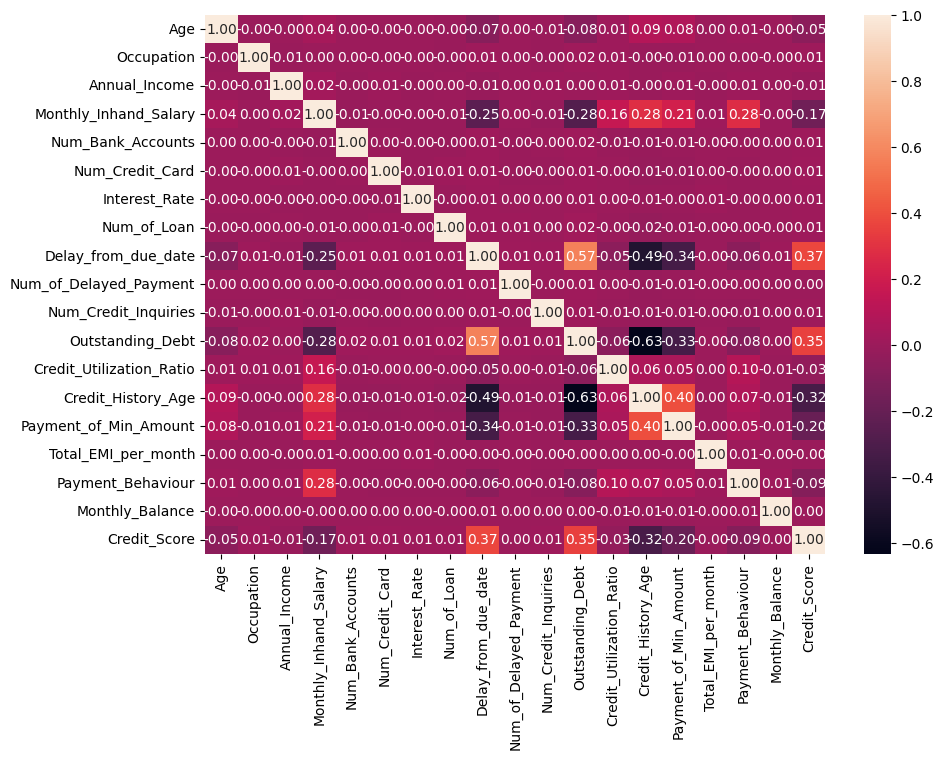

In [98]:
plt.figure(figsize=(10,7))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')        
plt.show()

from this heatmap, we can see that there are 3 features high correlated to 'Credit_Score' there are 'Delay_from_due_date' (0.37), 'Outstanding_Debt' (0.35), 'Credit_History_Age' (0.32)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53049 entries, 0 to 53048
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      53049 non-null  object 
 1   Age                       53049 non-null  float64
 2   Occupation                53049 non-null  int64  
 3   Annual_Income             53049 non-null  float64
 4   Monthly_Inhand_Salary     53049 non-null  float64
 5   Num_Bank_Accounts         53049 non-null  int64  
 6   Num_Credit_Card           53049 non-null  int64  
 7   Interest_Rate             53049 non-null  int64  
 8   Num_of_Loan               53049 non-null  float64
 9   Type_of_Loan              53049 non-null  object 
 10  Delay_from_due_date       53049 non-null  int64  
 11  Num_of_Delayed_Payment    53049 non-null  float64
 12  Changed_Credit_Limit      53049 non-null  object 
 13  Num_Credit_Inquiries      53049 non-null  float64
 14  Credit

In [100]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3.178054,9,"19,114.120000","1,824.843333",3,4,3,4.000000,3,7.000000,4.000000,809.980000,26.822620,22.100000,2,49.574949,4.000000,312.494089,0
1,3.178054,9,"19,114.120000","1,824.843333",3,4,3,4.000000,3,8.000000,4.000000,809.980000,22.537593,22.700000,2,49.574949,1.000000,244.565317,0
2,3.367296,15,"34,847.840000","3,037.986667",2,4,6,1.000000,3,4.000000,2.000000,605.030000,24.464031,26.700000,2,18.816215,1.000000,470.690627,0
3,3.367296,3,"34,847.840000","3,037.986667",2,4,6,1.000000,7,1.000000,2.000000,605.030000,38.550848,26.800000,2,18.816215,6.000000,484.591214,0
4,3.367296,3,"34,847.840000","3,037.986667",2,1385,6,1.000000,3,-1.000000,2.000000,605.030000,33.224951,26.900000,2,18.816215,6.000000,466.466476,0


In [101]:
X = data_temp.drop('Credit_Score', axis=1)
y = data_temp[['Credit_Score']]

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df2 = my_modeling(X_std,y)
df2['status'] = 'scaling + remove outlier age'

In [102]:
df

,Method,F1 Score,Classification Report
0,LogisticRegression,0.422973,precision recall f1-score ...
1,DecisionTreeClassifier,0.673107,precision recall f1-score ...
2,RandomForestClassifier,0.742437,precision recall f1-score ...
3,XGBClassifier,0.700241,precision recall f1-score ...


In [103]:
df1

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.673529,precision recall f1-score ...,scaling
1,RandomForestClassifier'>,0.742807,precision recall f1-score ...,scaling
2,XGBClassifier'>,0.704944,precision recall f1-score ...,scaling


In [104]:
df2

,Method,F1 Score,Classification Report,status
0,DecisionTreeClassifier'>,0.680097,precision recall f1-score ...,scaling + remove outlier age
1,RandomForestClassifier'>,0.776788,precision recall f1-score ...,scaling + remove outlier age
2,XGBClassifier'>,0.729125,precision recall f1-score ...,scaling + remove outlier age


### Cross Validation

In [110]:
scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')

In [111]:
scores

array([0.79009469, 0.80153983, 0.79554778, 0.79128221, 0.79818571])

### Tunning Parameter

In [126]:
rf_clf = RandomForestClassifier(random_state=42)

In [120]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(6,7,8,9,10)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (6, 7, 8, 9, 10),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [121]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 10, 'n_estimators': 50}",0.729578,1
22,"{'max_depth': 10, 'n_estimators': 30}",0.726744,2
23,"{'max_depth': 10, 'n_estimators': 40}",0.726582,3
21,"{'max_depth': 10, 'n_estimators': 20}",0.725611,4
19,"{'max_depth': 9, 'n_estimators': 50}",0.722938,5
17,"{'max_depth': 9, 'n_estimators': 30}",0.721076,6
16,"{'max_depth': 9, 'n_estimators': 20}",0.720833,7
18,"{'max_depth': 9, 'n_estimators': 40}",0.720347,8
12,"{'max_depth': 8, 'n_estimators': 30}",0.716542,9
20,"{'max_depth': 10, 'n_estimators': 10}",0.716380,10


after tunning parameter, we got the highest score (0.73) at 'max_depth': 10, 'n_estimators': 50